In [1]:
%pip install pandas
%pip install numpy
%pip install sklearn
%pip install matplotlib
%pip install pyswarms
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
from utils import GPR, mean_squared_error, root_mean_squared_error, visualize, generate_sample

import numpy as np
from tqdm import tqdm
import plotly.express as px

np.random.seed(42)

In [3]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_train_data_points = 500
n_test_data_points = 10_000
n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

In [4]:
X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=1)
X_test,  y_test  = generate_sample(n_test_data_points, n_dims, lower_bound, upper_bound, target_func)

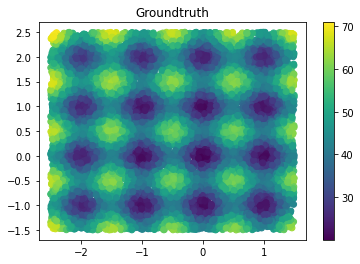

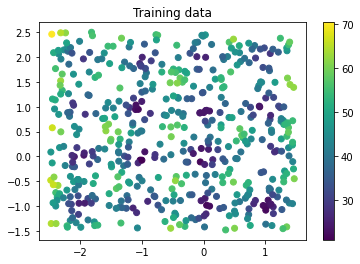

In [5]:
visualize(X_test, y_test, title='Groundtruth'), visualize(X_train, y_train, title='Training data');

In [6]:
args = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w': 0.9,
    'n_optim_steps': 10,
    'n_particles': 10,
    'n_restarts_optimizer': 10,
    "n_dims": n_dims
}

gpr = GPR(**args)

In [7]:
gpr = gpr.fit(X_train, y_train)

In [8]:
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

216.79025407566357

In [9]:
# dauert m 40s
gpr = gpr.hyper_optimize(X_train, y_train)
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


2022-07-18 16:37:03,039 - pyswarms.backend.generators - ERROR - generate_swarm() takes an int for n_particles and dimensions and an array for bounds
Traceback (most recent call last):
  File "c:\Users\I538840\Anaconda3\lib\site-packages\pyswarms\backend\generators.py", line 70, in generate_swarm
    pos = center * np.random.uniform(
  File "mtrand.pyx", line 1112, in numpy.random.mtrand.RandomState.uniform
  File "_common.pyx", line 577, in numpy.random._common.cont
TypeError: 'numpy.float64' object cannot be interpreted as an integer


TypeError: 'numpy.float64' object cannot be interpreted as an integer

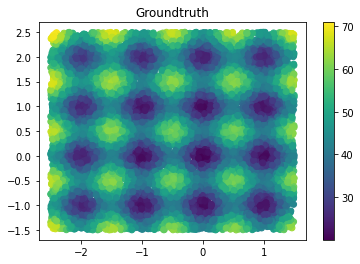

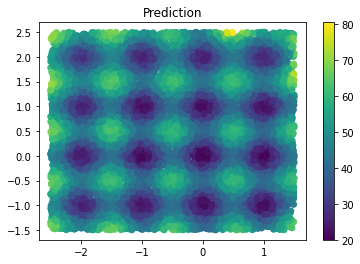

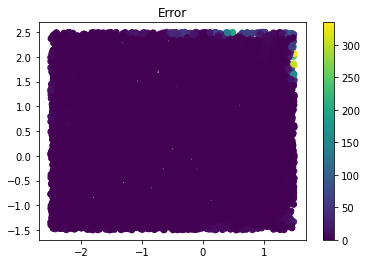

In [11]:
visualize(X_test, y_test, title="Groundtruth")
visualize(X_test, y_pred, title="Prediction")
visualize(X_test, (y_test.flatten()-y_pred.flatten())**2, title="Error");

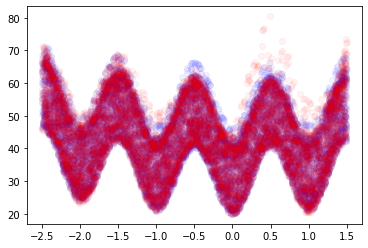

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test[0], target_func(X_test), label="Training data", color="blue", alpha=0.05)
plt.scatter(X_test[0], y_pred, label="Prediction", color="red", alpha=0.05);

In [14]:
n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors_mse = []
errors_rmse = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, n_dims, lower_bound, upper_bound, target_func, noise_scale=0)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train) 
    y_pred = gpr.predict(X_test)
    error_mse = mean_squared_error(y_test, y_pred)
    error_rmse = root_mean_squared_error(y_test, y_pred)
    errors_rmse.append(error_rmse)
    errors_mse.append(error_mse)
    
px.scatter(x=n_data_points, y=[errors_mse, errors_rmse], title='Error vs. Number of Data Points', log_y=True, trendline="lowess")

100%|██████████| 7/7 [00:23<00:00,  3.36s/it]
2022-07-18 16:40:32,334 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-07-18 16:40:32,336 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


In [16]:
from sklearn.metrics import r2_score

n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors_r2 = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, n_dims, lower_bound, upper_bound, target_func, noise_scale=0)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train) 
    y_pred = gpr.predict(X_test)
    error_r2 = r2_score(y_test, y_pred)
    errors_r2.append(error_r2)
    
px.scatter(x=n_data_points, y=errors_r2, title='Error (R2 Score) vs. Number of Data Points', log_y=True, trendline="lowess")

100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


In [18]:
from sklearn.metrics import mean_absolute_percentage_error as mape


n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors_mape = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, n_dims, lower_bound, upper_bound, target_func, noise_scale=0)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train) 
    y_pred = gpr.predict(X_test)
    error_mape = mape(y_test, y_pred)
    errors_mape.append(error_mape)
    
px.scatter(x=n_data_points, y=errors_mape, title='Error (MAPE) vs. Number of Data Points', log_y=True, trendline="lowess")

100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


In [19]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=noise_scales, y=errors, title='Error (MSE) vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:07<00:00,  1.32s/it]


In [20]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors_rmse = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error_rmse = root_mean_squared_error(y_test, y_pred)
    errors_rmse.append(error_rmse)
    
px.scatter(x=noise_scales, y=errors_rmse, title='Error (RMSE) vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:07<00:00,  1.29s/it]


In [22]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors_r2 = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error_r2 = r2_score(y_test, y_pred)
    errors_r2.append(error_r2)
    
px.scatter(x=noise_scales, y=errors_r2, title='Error (R2) vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:01<00:00,  4.03it/s]


In [23]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors_mape = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error_mape = mape(y_test, y_pred)
    errors_mape.append(error_mape)
    
px.scatter(x=noise_scales, y=errors_mape, title='Error (MAPE) vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:01<00:00,  4.21it/s]
